In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rc('text', usetex=True)
# %matplotlib notebook


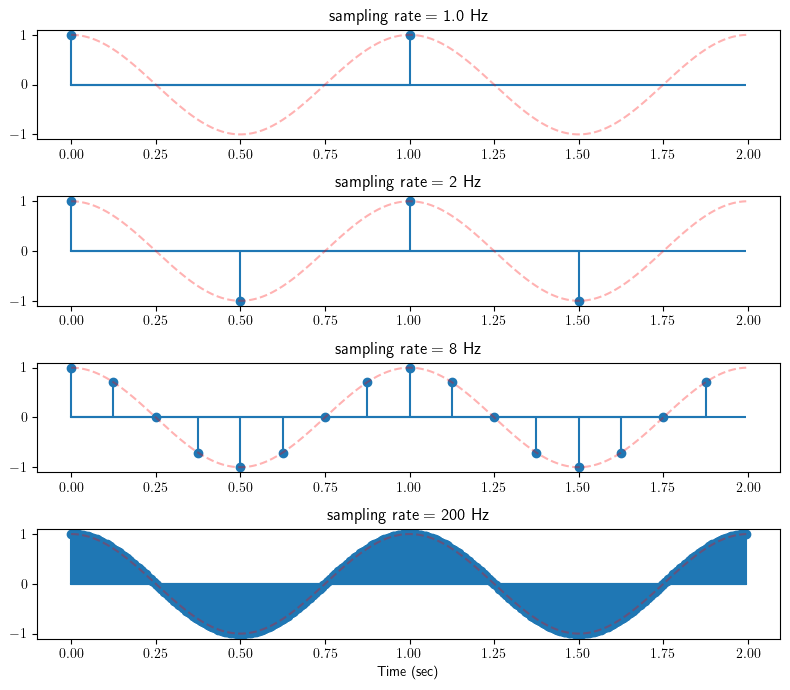

In [34]:

f =1 #hz
cycles = 2
T = 1/f #time period
total_time = cycles*T #seconds
nyquist_rate = 2*f

sampling_rates = [0.5,1,4,100] #times nyquist

fig,ax = plt.subplots(len(sampling_rates),1,figsize = (8,7))

for i in range(len(sampling_rates)):
    
    sampling_rate = sampling_rates[i]* nyquist_rate
    time = np.arange(0,sampling_rate*cycles)*(1/sampling_rate)
    sine = np.sin(2*math.pi*f*time + math.pi/2)
    ax[i].stem(time, sine, basefmt = '')
    ax[i].set_title(f'sampling rate = {sampling_rate} Hz')
    

    #generating continuous wave
    sampling_rate = 100* nyquist_rate
    time = np.arange(0,sampling_rate*cycles)*(1/sampling_rate)
    sine = np.sin(2*math.pi*f*time + math.pi/2)
    ax[i].hlines(0,0,time[-1])
    ax[i].plot(time,sine,linestyle = '--',alpha = 0.3, color = 'red')
    
   

    
ax[i].set_xlabel('Time (sec)')
fig.tight_layout()


# fig.savefig('Figure-1-sampling signal.png',dpi = 300, bbox_inches = 'tight')


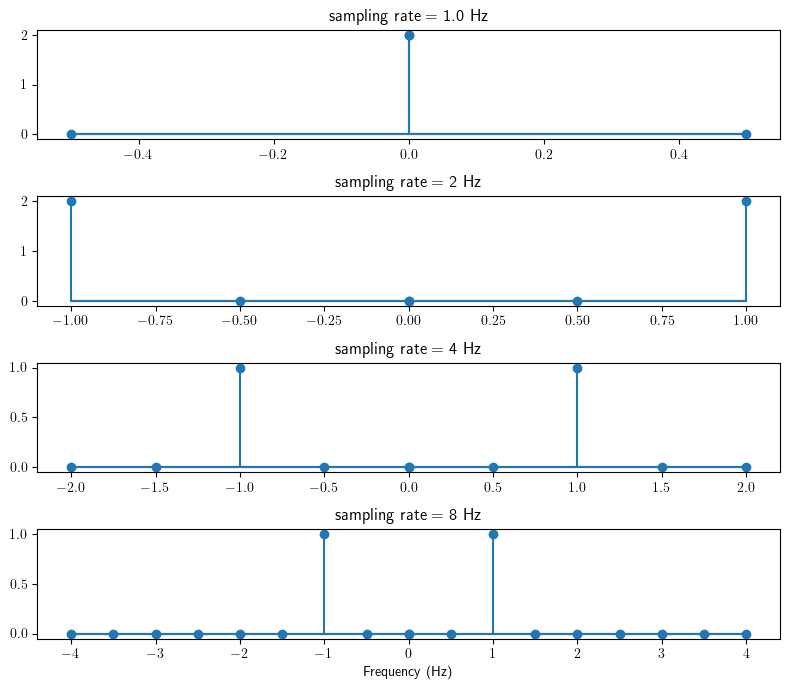

In [32]:

f =1 #hz
cycles = 2
T = 1/f #time period
total_time = cycles*T #seconds
nyquist_rate = 2*f

sampling_rates = [0.5,1,4] #times nyquist

fig2,freq_ax = plt.subplots(len(sampling_rates),1,figsize = (8,7))



for i in range(len(sampling_rates)):
    
    sampling_rate = sampling_rates[i]* nyquist_rate
    time = np.arange(0,sampling_rate*cycles)*(1/sampling_rate)
    sine = np.sin(2*math.pi*f*time + math.pi/2)
    
    
    
    fft_result = np.fft.fft(sine)
    fft_result = np.abs(fft_result)/(0.5*len(fft_result))
    fft_result = fft_result[0:int(len(fft_result)/2)+1]
    freq = np.linspace(0,sampling_rate/2,len(fft_result))
    
    
    freq_ax[i].stem(freq,fft_result,basefmt = '')
    freq_ax[i].stem(freq*-1,fft_result,basefmt = '#1f77b4')
    freq_ax[i].hlines(0,freq[-1]*-1,freq[-1], 'black')
#     freq_ax[i].set_ylim(0,1.1)
    freq_ax[i].set_title(f'sampling rate = {sampling_rate} Hz')
    
    
   

    
# ax[i].set_xlabel('Time (sec)')
freq_ax[i].set_xlabel('Frequency (Hz)')
fig2.tight_layout()


# fig2.savefig('Figure-2-Fourier transform.png',dpi = 300, bbox_inches = 'tight')

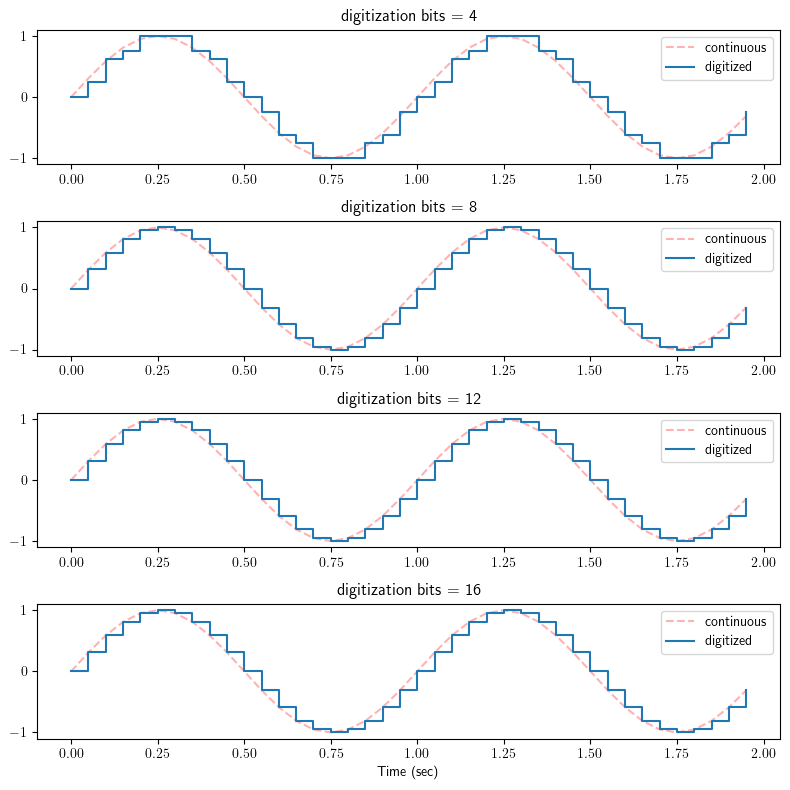

In [53]:
#Digitization

f =1 #hz
cycles = 2
T = 1/f #time period
total_time = cycles*T #seconds
nyquist_rate = 2*f

bits = [4,8,12,16] #times nyquist

fig,ax = plt.subplots(len(bits),1,figsize = (8,8))

for i in range(len(bits)):
    
    sampling_rate = 10* nyquist_rate
    time = np.arange(0,sampling_rate*cycles)*(1/sampling_rate)
    cont_sine = np.sin(2*math.pi*f*time)
    ax[i].plot(time, cont_sine,linestyle = '--',alpha = 0.3, color = 'red', label = 'continuous')
    
    
    digitized_sine = (cont_sine-min(cont_sine))/(max(cont_sine)-min(cont_sine))*2**bits[i]
    digitized_sine = np.round(digitized_sine,0)
    digitized_sine = digitized_sine/2**bits[i]
    digitized_sine = digitized_sine*2 -1
    ax[i].step(time, digitized_sine,where = 'post', label = 'digitized')
    ax[i].set_title(f'digitization bits = {bits[i]}')
    ax[i].legend()

#     #generating continuous wave
#     sampling_rate = 100* nyquist_rate
#     time = np.arange(0,sampling_rate*cycles)*(1/sampling_rate)
#     sine = np.sin(2*math.pi*f*time)
#     ax[i].hlines(0,0,time[-1])
#     ax[i].plot(time,sine,linestyle = '--',alpha = 0.3, color = 'red')
    
   

    
ax[i].set_xlabel('Time (sec)')
fig.tight_layout()


# fig.savefig('Figure-3-digitization.png',dpi = 300, bbox_inches = 'tight')


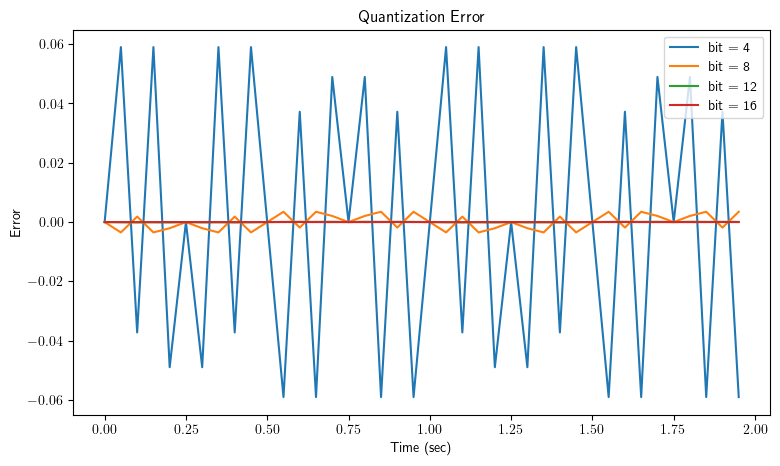

In [74]:
#Quantization error

f =1 #hz
cycles = 2
T = 1/f #time period
total_time = cycles*T #seconds
nyquist_rate = 2*f

bits = [4,8,12,16] #times nyquist

# fig,ax = plt.subplots(len(bits),1,figsize = (8,8))

plt.figure(figsize = (9,5))
for i in range(len(bits)):
    
    sampling_rate = 10* nyquist_rate
    time = np.arange(0,sampling_rate*cycles)*(1/sampling_rate)
    cont_sine = np.sin(2*math.pi*f*time)
#     ax[i].plot(time, cont_sine,linestyle = '--',alpha = 0.3, color = 'red', label = 'continuous')
    
    
    digitized_sine = (cont_sine-min(cont_sine))/(max(cont_sine)-min(cont_sine))*2**bits[i]
    digitized_sine = np.round(digitized_sine,0)
    digitized_sine = digitized_sine/2**bits[i]
    digitized_sine = digitized_sine*2 -1
    
    error = cont_sine-digitized_sine
    plt.plot(time, error, label = f'bit = {bits[i]}')
#     ax[i].set_title(f'digitization bits = {bits[i]}')
    plt.legend()

#     #generating continuous wave
#     sampling_rate = 100* nyquist_rate
#     time = np.arange(0,sampling_rate*cycles)*(1/sampling_rate)
#     sine = np.sin(2*math.pi*f*time)
#     ax[i].hlines(0,0,time[-1])
#     ax[i].plot(time,sine,linestyle = '--',alpha = 0.3, color = 'red')
    
   

    
plt.xlabel('Time (sec)')
plt.ylabel('Error')
plt.title('Quantization Error')
# fig.tight_layout()

plt.savefig('Figure-4-digitization_error.png',dpi = 300, bbox_inches = 'tight')


In [17]:
def digitize(data, minm ,maxm, bits):
    rng = maxm-minm
    digitized_data = ((data-minm)/rng)*2**bits
    digitized_data = np.round(digitized_data,0)
    digitized_data = digitized_data/2**bits
    digitized_data = digitized_data*rng + minm

    return digitized_data

def butterLowpass(cut, fs, order):
    nyq = 0.5 * fs
    low = cut/nyq
    sos = sp.signal.butter(order, low, analog=False, btype='lowpass', output='sos')
    return sos

def butterLowpassFilter(data, cutF, fs, order =5):
    sos = butterLowpass(cutF, fs,order)
    filtered = sp.signal.sosfiltfilt(sos, data)
    return filtered

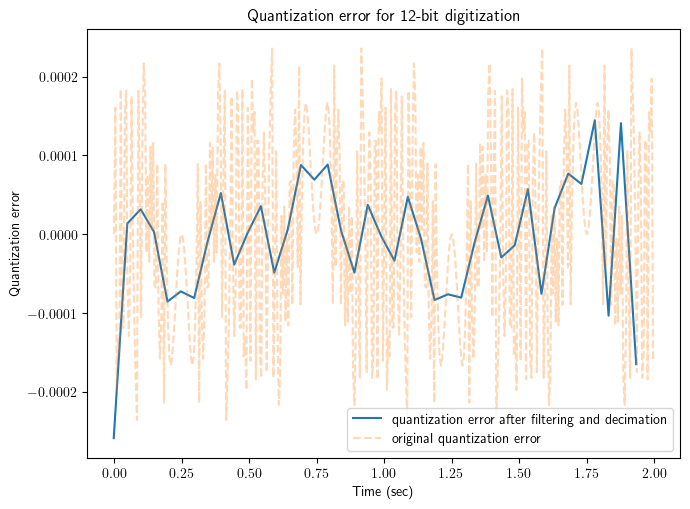

In [38]:
#filtering
from scipy.signal import butter, lfilter,decimate
import scipy as sp



f =1 #hz
cycles = 2
T = 1/f #time period
total_time = cycles*T #seconds
nyquist_rate = 2*f


sampling_rate = 100* nyquist_rate
time = np.arange(0,sampling_rate*cycles)*(1/sampling_rate)
cont_sine = np.sin(2*math.pi*f*time)


digitized_sine = digitize(cont_sine,-1,1,12)
digitized_sine_filtered = butterLowpassFilter(digitized_sine,10*nyquist_rate,sampling_rate)

digitized_sine_filtered_decimate = decimate(filtered_sine,10)
time_decimate = decimate(time,10)


cont_sine_decimate = decimate(cont_sine,10)
quant_error_improved = cont_sine_decimate-digitized_sine_filtered_decimate


plt.figure(figsize = (7,5))
plt.plot(time_decimate,quant_error_improved, label = 'quantization error after filtering and decimation')
    


# digitized_sine = (cont_sine-min(cont_sine))/(max(cont_sine)-min(cont_sine))*2**12
# digitized_sine = np.round(digitized_sine,0)
# digitized_sine = digitized_sine/2**12
# digitized_sine = digitized_sine*2 -1
digitized_sine = digitize(cont_sine,-1,1,12)

error = cont_sine-digitized_sine

plt.plot(time,error,linestyle = '--',alpha = 0.3, label = 'original quantization error')
# plt.plot(time_decimate,decimate(error,10))

    
plt.xlabel('Time (sec)')
plt.ylabel('Quantization error')
plt.tight_layout()
plt.legend()
plt.title('Quantization error for 12-bit digitization ')
# plt.savefig('Figure-5-filtering.png',dpi = 300, bbox_inches = 'tight')


#quantization error arrising from digitization is analogous to high frequency noise added to the original continuous signal
#thus we can reduce it by filtering the higher frequency component. Quantization adds white noise to the data